In [21]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

file_path = r'.\datainginfo.csv'
data = pd.read_csv(file_path)
data

,ID,CICLO,CODIGO,NOMBRE DE LA ASIGNATURA,PRE REQUISITO,CREDITOS APROBADOS,MODALIDAD,CRÉDITOS
0,1,PRIMER CICLO,C0090,FILOSOFIA,NINGUNO,0,PRESENCIAL,3
1,2,PRIMER CICLO,C0613,COMUNICACION Y REDACCION 1,NINGUNO,0,PRESENCIAL,3
2,3,PRIMER CICLO,C0659,CALCULO DIFERENCIAL PARA INGENIERIA,NINGUNO,0,PRESENCIAL,4
3,4,PRIMER CICLO,C0737,ALGEBRA MATRICIAL Y GEOMETRIA ANALITICA,NINGUNO,0,PRESENCIAL,3
4,5,PRIMER CICLO,C0201,QUIMICA GENERAL,NINGUNO,0,PRESENCIAL,5
...,...,...,...,...,...,...,...,...
59,60,DECIMO CICLO,C8292,TEMAS AVANZADOS DE SEGURIDAD INFORMATICA,CRIPTOGRAFIA Y SEGURIDAD INFORMATICA,0,PRESENCIAL,4
60,61,DECIMO CICLO,C8293,DERECHO INFORMATICO,NINGUNO,150,NO PRESENCIAL,2
61,62,DECIMO CICLO,C8467,ASIGNATURA ELECTIVA 5,NINGUNO,0,PRESENCIAL,3
62,63,DECIMO CICLO,C8466,ASIGNATURA ELECTIVA 6,NINGUNO,0,PRESENCIAL,3


C:\Users\Usuario\AppData\Local\Temp\ipykernel_152476\3228377762.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=1.0)


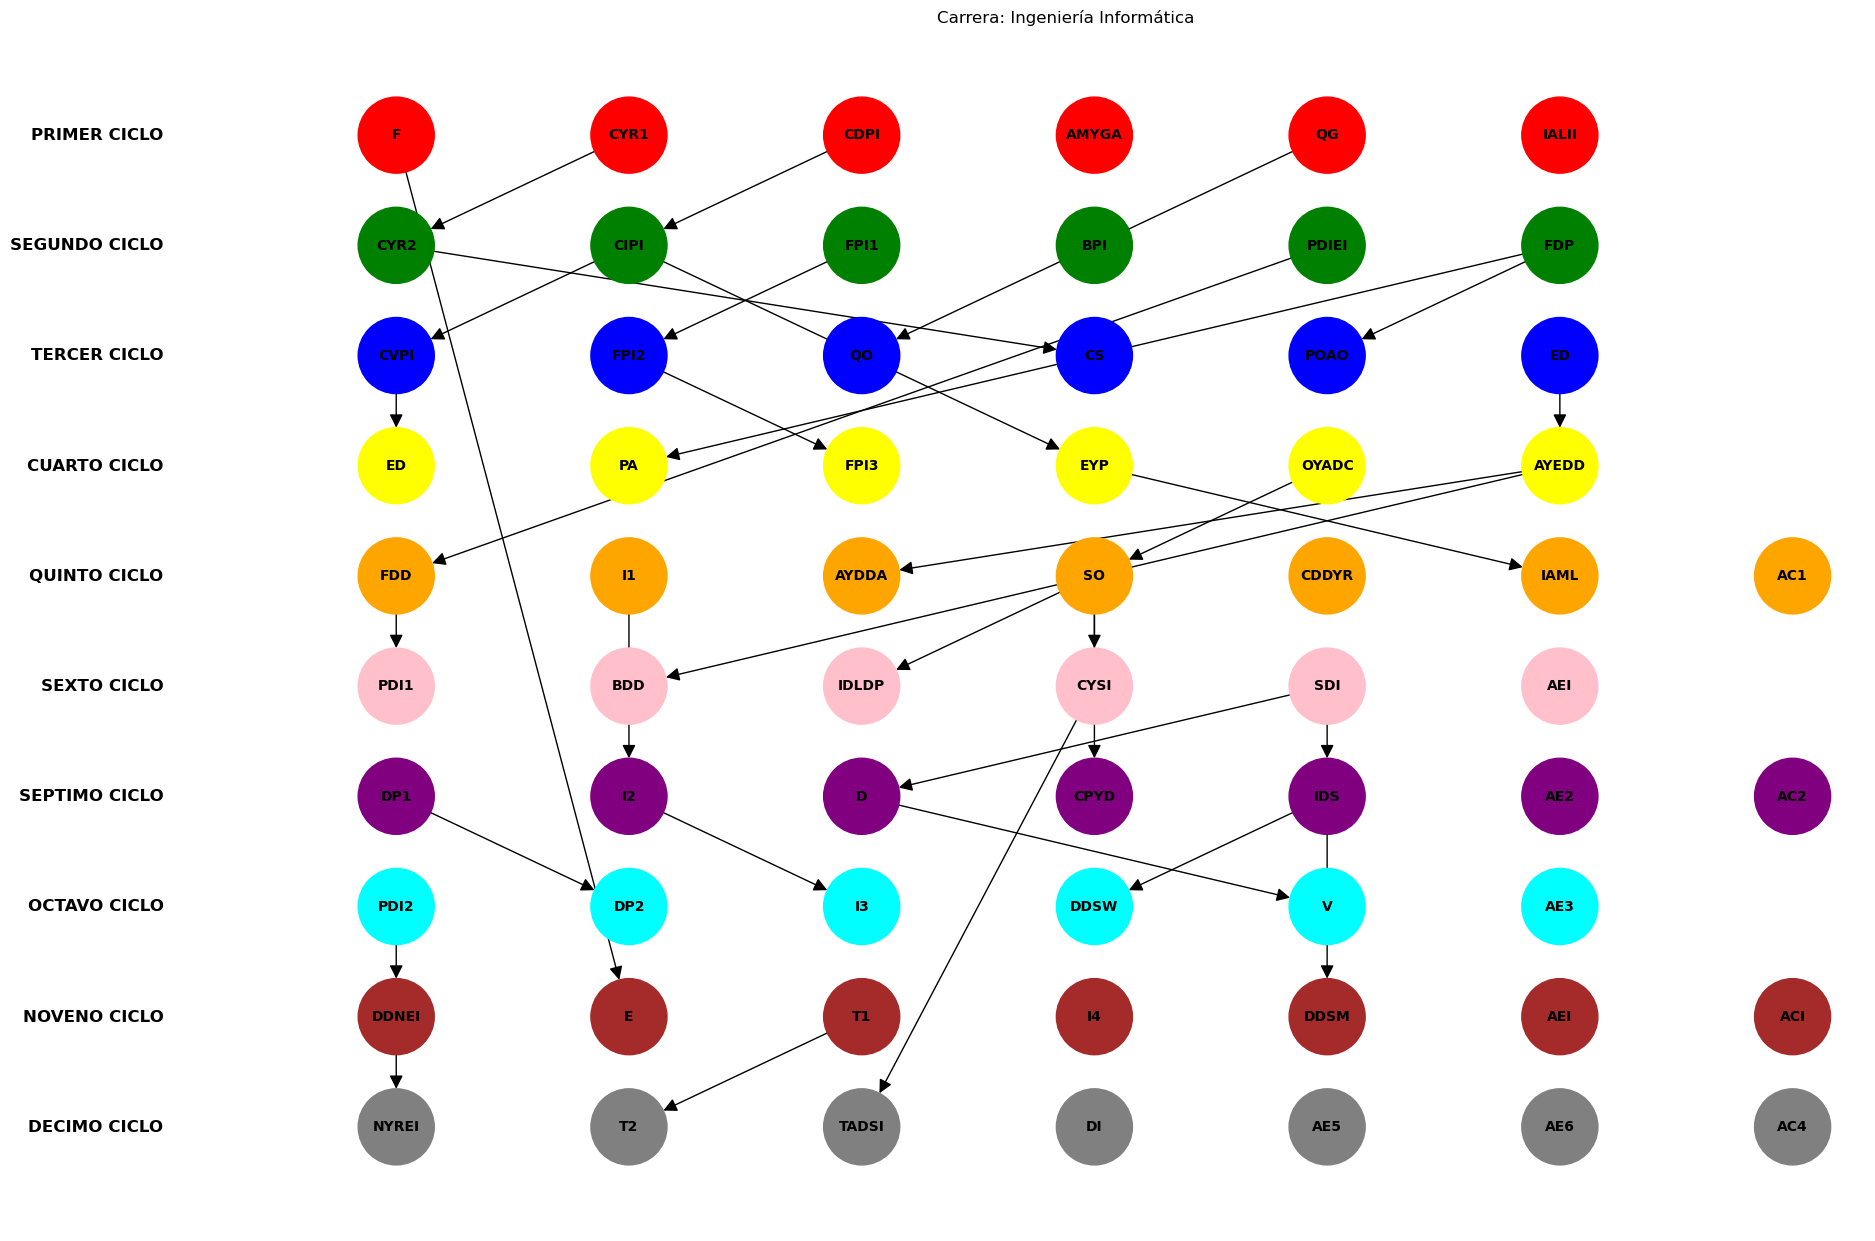

In [22]:
def obtener_iniciales(nombre):
    partes = nombre.split()
    iniciales = ''.join(p[0].upper() for p in partes if p.isalpha())
    numeros = ''.join(p for p in partes if p.isdigit())
    return iniciales + numeros

colores_ciclo = {
    'PRIMER CICLO': 'red', 'SEGUNDO CICLO': 'green', 'TERCER CICLO': 'blue',
    'CUARTO CICLO': 'yellow', 'QUINTO CICLO': 'orange', 'SEXTO CICLO': 'pink',
    'SEPTIMO CICLO': 'purple', 'OCTAVO CICLO': 'cyan', 'NOVENO CICLO': 'brown', 
    'DECIMO CICLO': 'gray'
}

G = nx.DiGraph()
pos = {}
colores_nodos = []
colores_aristas = []
codigo_curso = data.set_index('NOMBRE DE LA ASIGNATURA')['CODIGO'].to_dict()
niveles_ciclo = {
    'PRIMER CICLO': 0, 'SEGUNDO CICLO': -1, 'TERCER CICLO': -2, 'CUARTO CICLO': -3,
    'QUINTO CICLO': -4, 'SEXTO CICLO': -5, 'SEPTIMO CICLO': -6, 'OCTAVO CICLO': -7,
    'NOVENO CICLO': -8, 'DECIMO CICLO': -9
}

for index, fila in data.iterrows():
    id_nodo = fila['CODIGO']
    etiqueta_nodo = obtener_iniciales(fila['NOMBRE DE LA ASIGNATURA'])
    ciclo = fila['CICLO']
    x_pos = len([n for n in G.nodes if G.nodes[n].get('ciclo') == ciclo])
    y_pos = niveles_ciclo[ciclo]
    pos[id_nodo] = (x_pos, y_pos)
    colores_nodos.append(colores_ciclo[ciclo])

    G.add_node(id_nodo, label=etiqueta_nodo, ciclo=ciclo)

    prereq = fila['PRE REQUISITO']
    if prereq and prereq != 'NINGUNO':
        codigo_prereq = codigo_curso.get(prereq, None)
        if codigo_prereq and codigo_prereq in G.nodes:
            G.add_edge(codigo_prereq, id_nodo)
            colores_aristas.append('black')

plt.figure(figsize=(16, 12))
nx.draw(G, pos, node_color=colores_nodos, edge_color=colores_aristas, with_labels=True,
        labels=nx.get_node_attributes(G, 'label'), font_size=10, font_weight='bold', node_size=3000, arrowstyle='-|>', arrowsize=20)

for ciclo, y_pos in niveles_ciclo.items():
    plt.text(-1, y_pos, ciclo, horizontalalignment='right', verticalalignment='center', fontweight='bold', fontsize=12)

plt.title('Carrera: Ingeniería Informática')
plt.axis('off')
plt.tight_layout(pad=1.0)
